In [27]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=122605 sha256=a26a2cab77a78392829fbdec547418385c34f1a30625f522514c1ab325adfbb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-67h6stbn/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


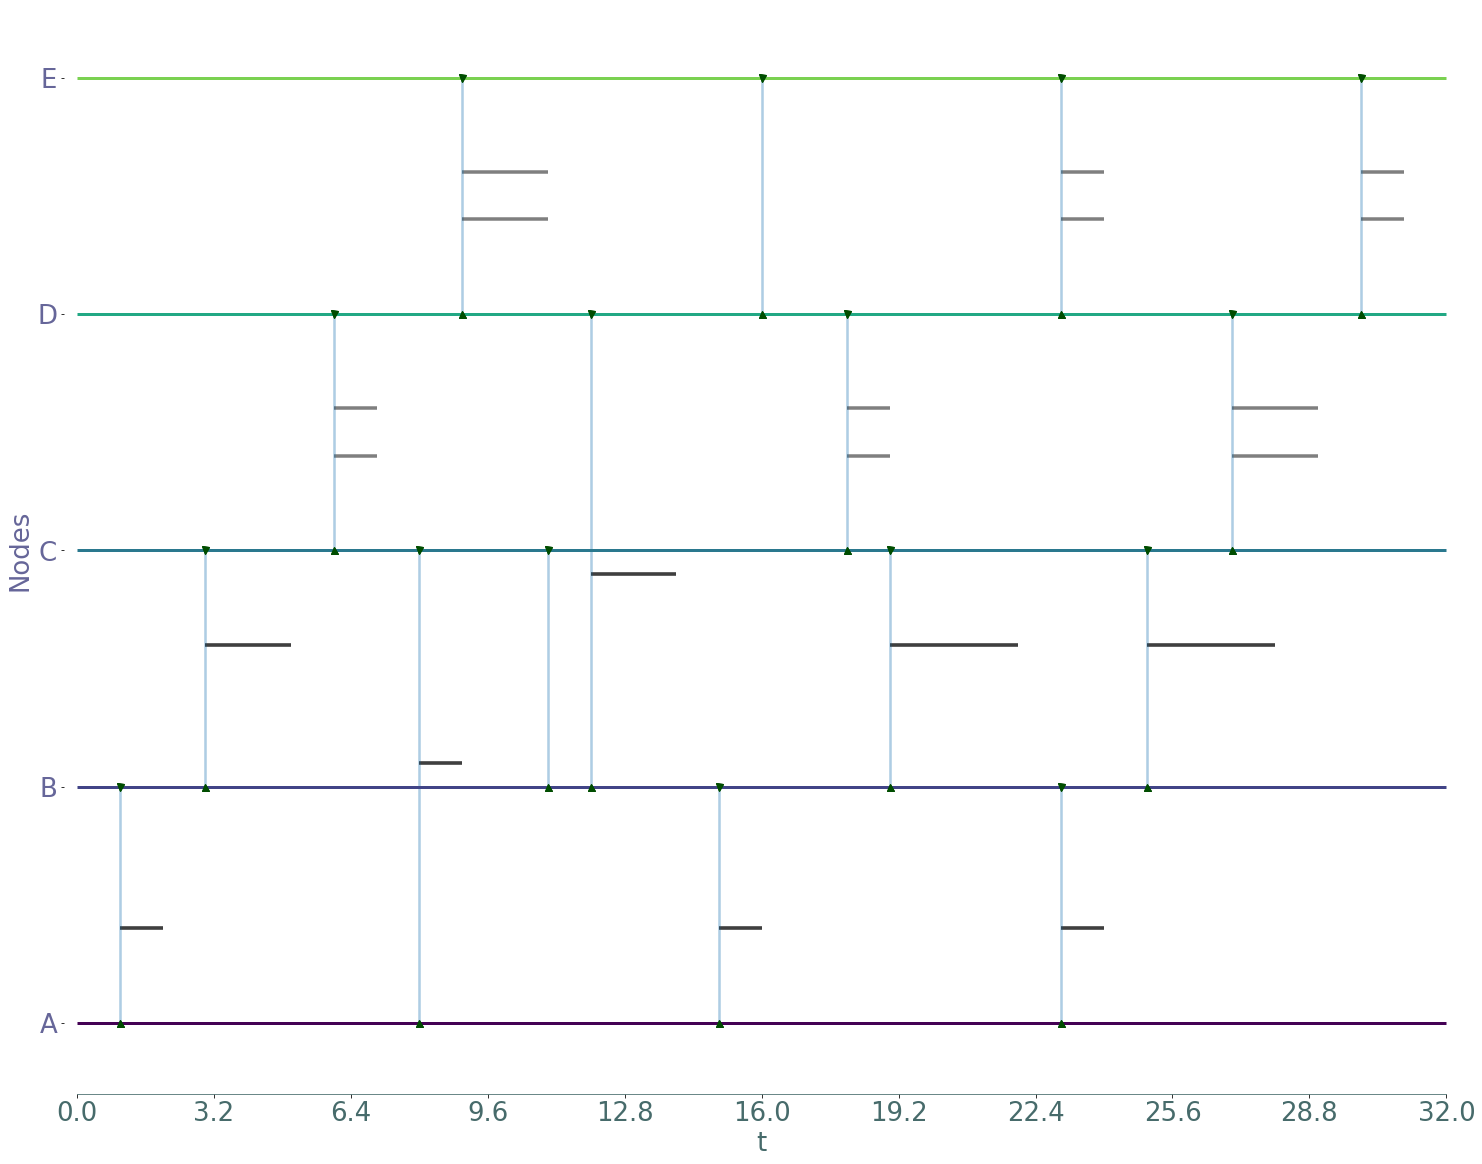

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [4]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [5]:
events, events_reverse = bt.events_dic(nouveau)

In [6]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [7]:
node = 0

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [9]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [10]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [12]:
before, after = bt.volume_instantenuous(nouveau, G, GT, events, events_reverse)
mx = bt.max_volume_superposition(GT)
print(mx)

2


In [13]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [14]:
sigma_r

{(0, 0.0): vol(1,0),
 (0, 1.0): vol(1,0),
 (0, 2.0): vol(1,0),
 (0, 3.0): vol(1,0),
 (0, 5.0): vol(1,0),
 (0, 6.0): vol(1,0),
 (0, 7.0): vol(1,0),
 (0, 8.0): vol(1,0),
 (0, 9.0): vol(1,0),
 (0, 11.0): vol(1,0),
 (0, 12.0): vol(1,0),
 (0, 14.0): vol(1,0),
 (0, 15.0): vol(1,0),
 (0, 16.0): vol(1,0),
 (0, 18.0): vol(1,0),
 (0, 19.0): vol(1,0),
 (0, 22.0): vol(1,0),
 (0, 23.0): vol(1,0),
 (0, 24.0): vol(1,0),
 (0, 25.0): vol(1,0),
 (0, 27.0): vol(1,0),
 (0, 28.0): vol(1,0),
 (0, 29.0): vol(1,0),
 (0, 30.0): vol(1,0),
 (0, 31.0): vol(1,0),
 (0, 32.0): vol(1,0),
 (1, 0.0): vol(0,0),
 (1, 1.0): vol(1,0),
 (1, 2.0): vol(1,0),
 (1, 3.0): vol(1,0),
 (1, 5.0): vol(1,0),
 (1, 6.0): vol(1,0),
 (1, 7.0): vol(1,0),
 (1, 8.0): vol(1,0),
 (1, 9.0): vol(1,0),
 (1, 11.0): vol(1,0),
 (1, 12.0): vol(1,0),
 (1, 14.0): vol(1,0),
 (1, 15.0): vol(1,0),
 (1, 16.0): vol(1,0),
 (1, 18.0): vol(1,0),
 (1, 19.0): vol(1,0),
 (1, 22.0): vol(1,0),
 (1, 23.0): vol(1,0),
 (1, 24.0): vol(1,0),
 (1, 25.0): vol(1,0),
 (1, 2

In [15]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [16]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [17]:
deltasvvt

{(0, 1.0): vol(0,0),
 (1, 1.0): vol(0,0),
 (0, 2.0): vol(0,0),
 (1, 2.0): vol(0,0),
 (2, 9.0): vol(0,0),
 (1, 11.0): vol(28.0,0),
 (0, 15.0): vol(0,0),
 (1, 15.0): vol(0,0),
 (0, 16.0): vol(0,0),
 (1, 16.0): vol(0,0),
 (0, 23.0): vol(0,0),
 (1, 23.0): vol(0,0),
 (0, 24.0): vol(0,0),
 (1, 24.0): vol(0,0),
 (2, 3.0): vol(10.0,0),
 (2, 5.0): vol(0,0),
 (0, 8.0): vol(0,0),
 (2, 8.0): vol(0,0),
 (0, 9.0): vol(0,0),
 (2, 19.0): vol(42.0,0),
 (2, 22.0): vol(0,0),
 (2, 25.0): vol(105.0,0),
 (2, 27.0): vol(0,0),
 (2, 28.0): vol(0,0),
 (3, 6.0): vol(12.0,0),
 (3, 7.0): vol(0,0),
 (3, 12.0): vol(99.0,0),
 (3, 14.0): vol(0,0),
 (3, 18.0): vol(0,0),
 (3, 19.0): vol(92.0,0),
 (3, 27.0): vol(120.0,0),
 (3, 28.0): vol(0,0),
 (3, 29.0): vol(0,0),
 (4, 9.0): vol(42.0,0),
 (4, 11.0): vol(0,0),
 (4, 16.0): vol(98.0,0),
 (4, 23.0): vol(49.0,0),
 (4, 24.0): vol(0,0),
 (4, 30.0): vol(48.0,0),
 (4, 31.0): vol(0,0)}

In [18]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

In [19]:
contribution

{1: {1.0: vol(0,0),
  5.0: vol(27.0,-1),
  3.0: vol(64.0,0),
  2.0: vol(64.0,0),
  15.0: vol(0,0),
  22.0: vol(0,0),
  18.0: vol(183.0,0),
  19.0: vol(183.0,0),
  16.0: vol(183.0,0),
  23.0: vol(0,0),
  28.0: vol(8.727272727272727,-1),
  27.0: vol(13.09090909090909,0),
  25.0: vol(273.0,0),
  24.0: vol(273.0,0),
  14.0: vol(49.0,-1),
  12.0: vol(197.0,0),
  11.0: vol(225.0,0),
  0.0: vol(0,0),
  6.0: vol(0,0),
  7.0: vol(0,0),
  8.0: vol(0,0),
  9.0: vol(0,0),
  29.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  32.0: vol(0,0)},
 0: {1.0: vol(0,0),
  2.0: vol(64.0,0),
  15.0: vol(0,0),
  16.0: vol(183.0,0),
  23.0: vol(0,0),
  24.0: vol(273.0,0),
  8.0: vol(0,0),
  9.0: vol(225.0,0),
  0.0: vol(0,0),
  3.0: vol(0,0),
  5.0: vol(0,0),
  6.0: vol(0,0),
  7.0: vol(0,0),
  11.0: vol(0,0),
  12.0: vol(0,0),
  14.0: vol(0,0),
  18.0: vol(0,0),
  19.0: vol(0,0),
  22.0: vol(0,0),
  25.0: vol(0,0),
  27.0: vol(0,0),
  28.0: vol(0,0),
  29.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  3

In [21]:
contribution[2][29]

vol(26.18181818181818,-1)